In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

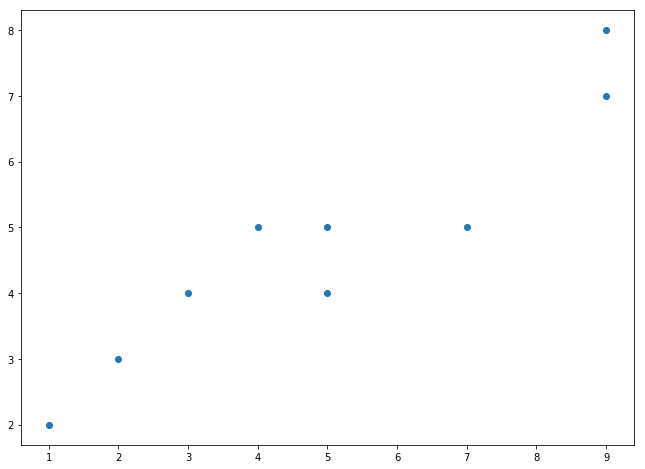

In [58]:
X = [1, 2, 1, 4, 5, 5, 8, 9, 9]
y = [2, 3, 3, 5, 5, 4, 6, 7, 8]
pontok = pd.DataFrame({'X': X, 'y': y})

X2 = [1, 2, 3, 4, 5, 5, 7, 9, 9]
y2 = [2, 3, 4, 5, 5, 4, 5, 7, 8]
pontok2 = pd.DataFrame({'X': X2, 'y': y2})

plt.figure(figsize=(11, 8))
plt.scatter(X2, y2)

### Dendogram

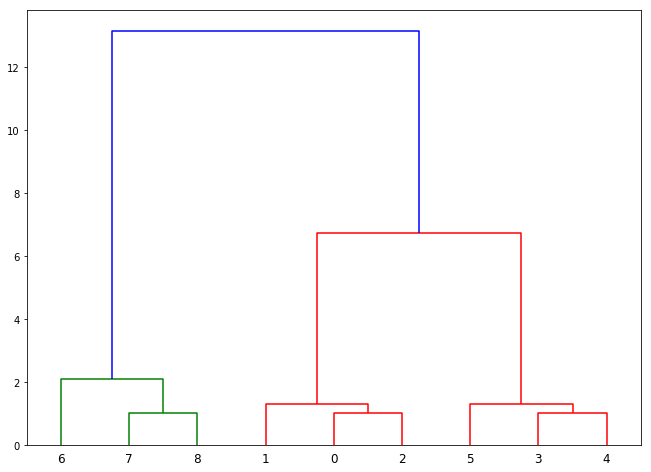

In [40]:
plt.figure(figsize=(11, 8))
dendrogram = sch.dendrogram(sch.linkage(pontok2, method='ward'))

### K-means

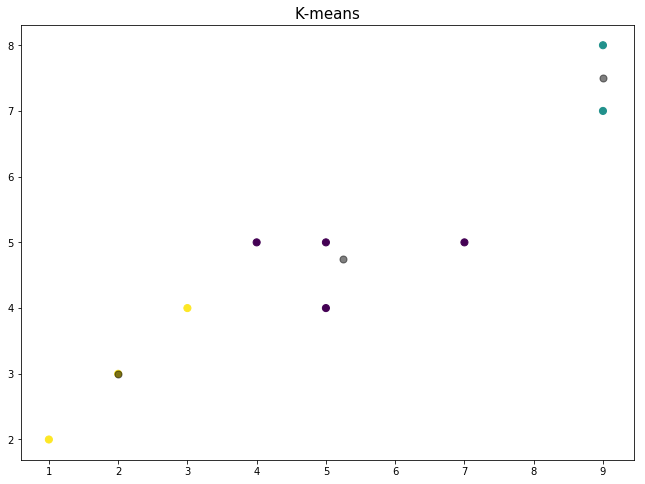

In [71]:
def kmeans(df, n):
    kmeans = KMeans(n_clusters=n)
    kclusters = kmeans.fit_predict(df)

    plt.figure(figsize=(11, 8))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=kclusters, s=50, cmap='viridis')

    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.5)
    plt.title('K-means', size=15)

kmeans(pontok2, 3)

### A-clusters

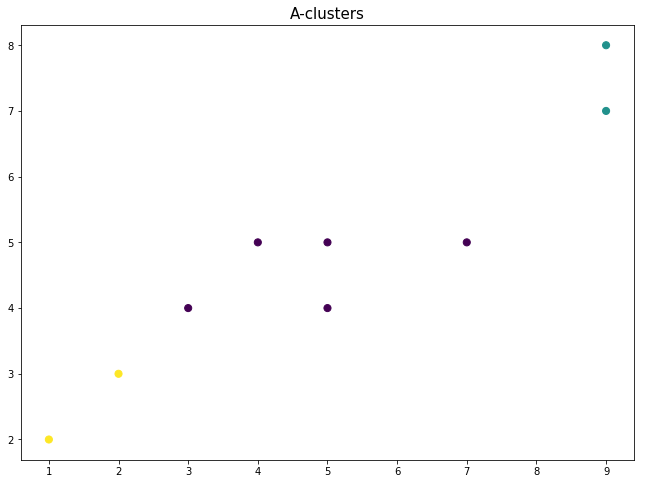

In [75]:
def aclusters(df, n):
    aclusters = AgglomerativeClustering(n_clusters=n, affinity='euclidean', linkage='ward') #linkage=ward, complete, average, single
    aclusters.fit_predict(df)
    labels = aclusters.labels_

    plt.figure(figsize=(11, 8))
    plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=labels, s=50, cmap='viridis')
    plt.title('A-clusters', size=15)
    
aclusters(pontok2, 3)

### Scipy

In [76]:
sch.linkage(pontok)

array([[ 0.        ,  2.        ,  1.        ,  2.        ],
       [ 1.        ,  9.        ,  1.        ,  3.        ],
       [ 3.        ,  4.        ,  1.        ,  2.        ],
       [ 5.        , 11.        ,  1.        ,  3.        ],
       [ 7.        ,  8.        ,  1.        ,  2.        ],
       [ 6.        , 13.        ,  1.41421356,  3.        ],
       [10.        , 12.        ,  2.82842712,  6.        ],
       [14.        , 15.        ,  3.16227766,  9.        ]])

In [92]:
sch.fcluster(sch.linkage(pontok), 0.9)

array([2, 2, 2, 3, 3, 3, 1, 1, 1], dtype=int32)

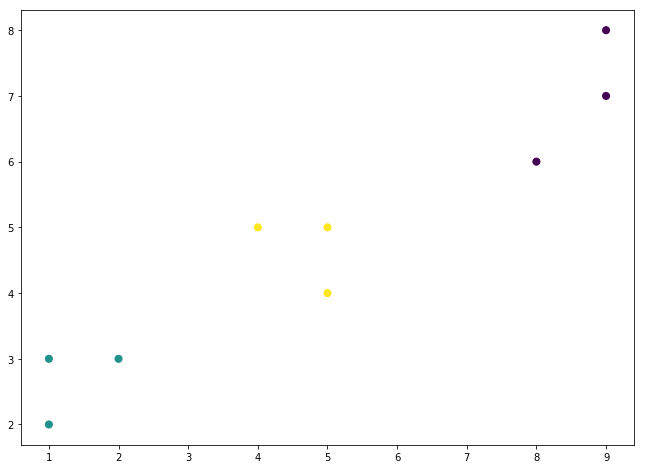

In [103]:
plt.figure(figsize=(11, 8))
plt.scatter(pontok.iloc[:, 0], pontok.iloc[:, 1], c=sch.fcluster(sch.linkage(pontok), 1), s=50, cmap='viridis')